#MinniProject 2: Classification of Textual Date


# Task 1: Acquire, preprocess, and analyze the data

## 20 news group dataset

### Data preparation:

In [ ]:
from numpy.core.fromnumeric import shape
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.datasets import fetch_20newsgroups
newsgroup_train = fetch_20newsgroups(subset='train', remove=(['headers', 'footers', 'quotes']))
# print(newsgroup_train.DESCR)
y_newsgroup = newsgroup_train.target
x_newsgroup = newsgroup_train.data
# df = pd.Dataframe(np.array(newsgroup_train.data, newsgroup_train.target))
df = pd.DataFrame([x_newsgroup, y_newsgroup.tolist()]).T
df.columns = ['text', 'target']
newsgroup_train.target_names
target=pd.DataFrame(newsgroup_train.target_names)
target.columns=['target_names']
target

,target_names
0,alt.atheism
1,comp.graphics
2,comp.os.ms-windows.misc
3,comp.sys.ibm.pc.hardware
4,comp.sys.mac.hardware
5,comp.windows.x
6,misc.forsale
7,rec.autos
8,rec.motorcycles
9,rec.sport.baseball


In [ ]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
df

,text,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14
...,...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
11310,"I have a (very old) Mac 512k and a Mac Plus, b...",4
11311,I just installed a DX2-66 CPU in a clone mothe...,3
11312,\nWouldn't this require a hyper-sphere. In 3-...,1


In [ ]:
# df.shape
# df.info()
# df.describe()
target_counts=df['target'].value_counts()
target_counts

10    600
15    599
8     598
9     597
11    595
7     594
13    594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: target, dtype: int64

Text(0.5, 1.0, 'Class distribution of 20newsgroup train data')

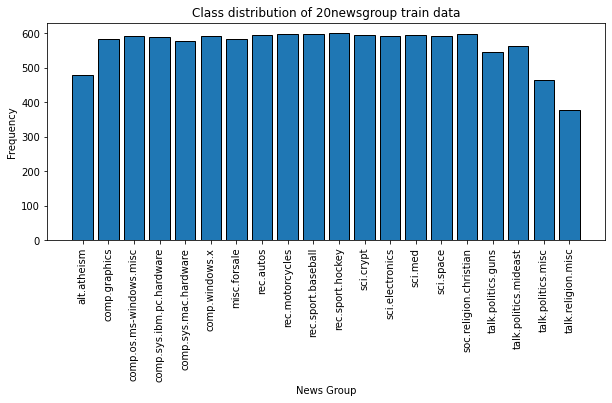

In [ ]:
x_coor=list(target['target_names'])
x_coor
y_coor=[]
for i in range(np.max(df['target'])+1):
  y_coor.append(target_counts[i])
y_coor
fig=plt.figure(figsize=(10,4))
plt.bar(x_coor, y_coor, ec='black')
plt.xticks(rotation=90)
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.title('Class distribution of 20newsgroup train data')

In [ ]:
df_class = pd.DataFrame({'news group':x_coor, 'frequency':y_coor})
df_class

,news group,frequency
0,alt.atheism,480
1,comp.graphics,584
2,comp.os.ms-windows.misc,591
3,comp.sys.ibm.pc.hardware,590
4,comp.sys.mac.hardware,578
5,comp.windows.x,593
6,misc.forsale,585
7,rec.autos,594
8,rec.motorcycles,598
9,rec.sport.baseball,597


Text(0.5, 1.0, 'pie chart for newgroup class')

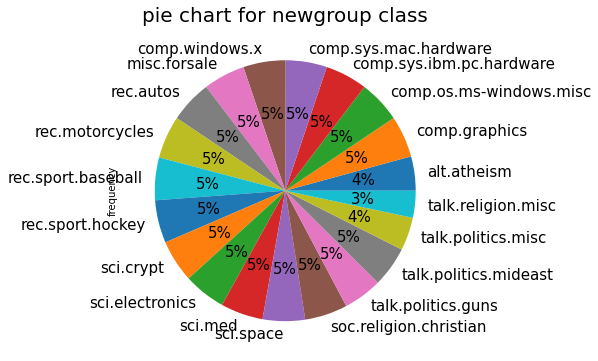

In [ ]:
df_class.groupby('news group').sum().plot(kind='pie', y='frequency', autopct='%1.0f%%', figsize=(8,6), fontsize=15, legend=False)
plt.title('pie chart for newgroup class', fontsize=20)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))


## Sentiment140 dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

twitter = pd.read_csv('/content/drive/MyDrive/COMP551p2/training.1600000.processed.noemoticon.csv', header=None, encoding='latin-1')
twitter.columns=['sentiment', 'id', 'date', 'query', 'user', 'text']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
twitter['sentiment']=twitter['sentiment'].replace(4,1)
twitter

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
twitter.isnull().sum()

sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

Text(0.5, 1.0, 'class dirstibution of sentiment140 dataset')

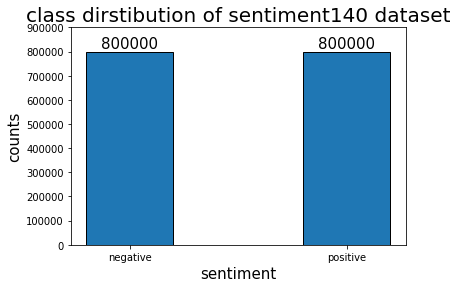

In [ ]:
twitter['sentiment'].value_counts()
x_coordinate=['negative', 'positive']
y_coordinate=[800000, 800000]
ax1=plt.bar(x_coordinate, y_coordinate, width=0.4, ec='black')
plt.xlabel('sentiment', fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.ylim([0,900000])
plt.text(0,y_coordinate[0], 800000, ha='center', va='bottom', fontsize=15)
plt.text(1, y_coordinate[1], 800000, ha='center', va='bottom', fontsize=15)
plt.title('class dirstibution of sentiment140 dataset', fontsize=20)


Text(0.5, 1.0, 'pie chart for label class')

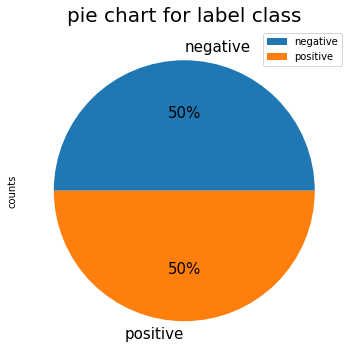

In [ ]:
twitter_class = pd.DataFrame({'sentiment':['negative', 'positive'], 'counts':[800000, 800000]})
twitter_class.groupby(['sentiment']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%', figsize=(8,6), fontsize=15)
plt.title('pie chart for label class', fontsize=20)

# Task 2: Implement Naive Bayes and k-fold cross validation

## K-FOLD Cross Validation

In [ ]:
def cross_validate(n, n_folds=5):
    #get the number of data samples in each split
    n_val = n // n_folds

    inds = np.random.permutation(n)
    inds = []

    for f in range(n_folds):
        tr_inds = []

        #get the validation indexes
        val_inds = list(range(f * n_val, (f+1)*n_val))

        #get the train indexes
        if f > 0:
            tr_inds = list(range(f*n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f+1)*n_val, n))
        #The yield statement suspends function’s execution and sends a value back to the caller
        #but retains enough state information to enable function to resume where it is left off
        yield tr_inds, val_inds


#define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

def kfoldCV(model,x_train,y_train,k):
  num_folds = k
  num_train = len(y_train)

  err_valid=np.zeros(num_folds)
      #Find the validation errors for num_folds splits for a given K
  for f,(tr, val) in enumerate(cross_validate(num_train, num_folds)):
    
    model.fit(x_train[tr], y_train[tr])

    err_valid[f] = loss(y_train[val], model.predict(x_train[val]))


  return np.mean(err_valid)

## Naive Bayes

### Multinomial Naive Bayes

In [ ]:
class MultinomialNaiveBayes:
  def __init__(self, alpha=1.0):
      self.alpha = alpha
      self.classes = 0
      self.class_num = 0
      self.mat = None
  def fit(self, x_train, y_train):
    self.classes = np.unique(y_train) # classes.
    self.class_num = np.max(y_train) + 1 # number of classes.
    # initilizing a list to store the occurences of each class.
    label_count = self.class_num * [0]
    
    # count the occurences of each class.
    for i in y_train:
      label_count[i] = label_count[i] + 1
    
    # initilizing a matrix to store likelihoods and priors.
    mat = np.zeros((self.class_num, x_train.shape[1] + 1))

    for i in range(self.class_num):
      for n, e in enumerate(y_train):
        if e == i:
          mat[i, :-1] = x_train[n] + mat[i, :-1]
      
      # calculate likelihood for each words.
      mat[i, :-1] = ((mat[i, :-1]) + self.alpha) / (label_count[i] + x_train.shape[1] * self.alpha) # Laplace smothing
      # calcualte prior for each class.
      mat[i, -1] = label_count[i] / x_train.shape[0]
      self.mat = mat
  def predict(self, xt):
    tmp = np.zeros((self.class_num, xt.shape[0]))

    for c in range(self.class_num):
      log_prior = np.log(self.mat[c, -1])
      tmp[c] = log_prior
    
    log_likelihood = np.log(self.mat[:, :-1])
    tmp = log_likelihood @ xt.T
    
    pred=[]
    for element in tmp.T:
      pred.append(np.argmax(element))
    return pred

  def acc(self, xt, yt):
    pred=self.predict(xt)
    acc = np.sum(pred==yt)/len(pred)
    return acc
    

### Gaussian Naive Bayes

In [ ]:
class NaiveBayesClassifier():
    
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        # numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) 
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

# Task 3: Run experiments

## 20 newsgroup dataset:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.tokenize import RegexpTokenizer
cv = CountVectorizer(stop_words='english')
x_train_count = cv.fit_transform(x_newsgroup)
cv.get_feature_names()

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_count)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
cv.vocabulary_
x_train_count.shape

(11314, 101322)

In [ ]:
newsgroup_test = fetch_20newsgroups(subset='test', remove=(['headers', 'footers', 'quotes']))
y_test_news=newsgroup_test.target
x=newsgroup_test.data
x_test_count = cv.transform(x)
x_test_tfidf = tfidf_transformer.transform(x_test_count)
x_test_tfidf.shape

(7532, 101322)

### Naive Bayes Cross Validation

In [ ]:
y_newsgroup

array([7, 4, 4, ..., 3, 1, 8])

In [ ]:
error_valid_min=100000
best_hyper = 0

for alpha in range(1,16,1):
  nbm = MultinomialNaiveBayes(alpha*0.1)
  error_valid = kfoldCV(nbm,x_train_tfidf,y_newsgroup,5)
  if(error_valid<error_valid_min):
    error_valid_min = error_valid
    best_hyper = alpha*0.1

best_hyper



0.1

In [ ]:
NB = MultinomialNaiveBayes(0.1)
NB.fit(x_train_tfidf, y_newsgroup)
NB.predict(x_test_tfidf)
NB.acc(x_test_tfidf, y_test_news)

0.6895910780669146

Text(0.5, 1.0, '20newgroup Naive Bayes accuracy line chart')

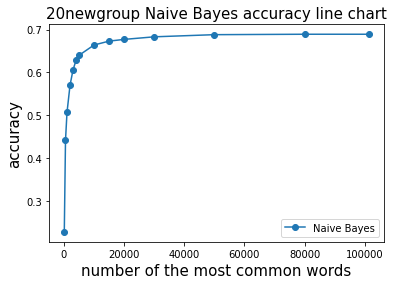

In [ ]:
num_features_news=[100, 500, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, 30000, 50000, 80000, 101322]
acc_newnb = [0.229, 0.442, 0.507, 0.570, 0.606, 0.628, 0.640, 0.664, 0.673, 0.677, 0.683, 0.688, 0.689, 0.689]
plt.plot(num_features_news, acc_newnb, marker='o', label="Naive Bayes")
plt.legend()
plt.xlabel('number of the most common words', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.title('20newgroup Naive Bayes accuracy line chart', fontsize=15)

Text(0.5, 1.0, '20newsgroup confusion matrix(Naive Bayes Classification)')

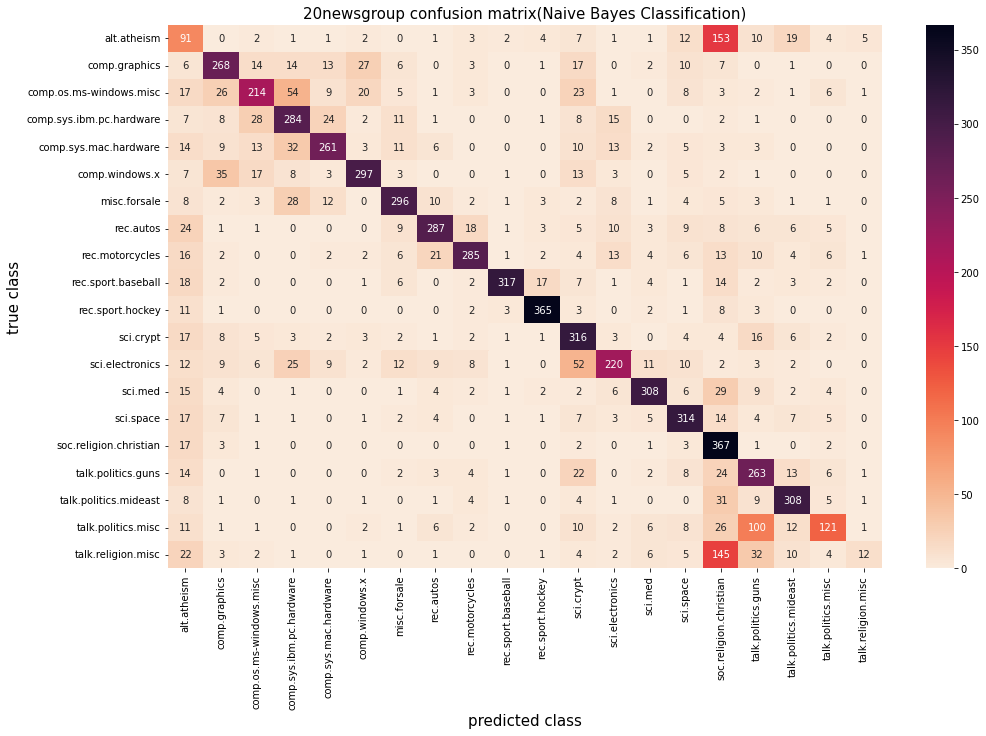

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
mat_news = metrics.confusion_matrix(y_test_news, NB.predict(x_test_tfidf))
plt.figure(figsize=(16,10))
newsmat=sns.heatmap(mat_news, annot=True, cmap=sns.cm.rocket_r, fmt='g',
            xticklabels=newsgroup_train.target_names, yticklabels=newsgroup_train.target_names)
plt.xlabel('predicted class', fontsize=15)
plt.ylabel('true class', fontsize=15)
plt.title('20newsgroup confusion matrix(Naive Bayes Classification)', fontsize=15)

### Logistic Regression Classification:

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_tfidf, y_newsgroup)
# log_reg.predict(x_test_tfidf)
log_reg.score(x_test_tfidf, y_test_news)

0.6909187466808284

#### cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
error_valid_min=100000
best_hyper = 0
for c in range(1,11,1):
  log_reg= LogisticRegression(C=c*0.1)
  error_valid = kfoldCV(log_reg,x_train_tfidf,y_newsgroup,5)
  if(error_valid<error_valid_min):
    error_valid_min = error_valid
    best_hyper = c*0.1
best_hyper

In [ ]:
log_reg = LogisticRegression(C=0.9)
log_reg.fit(x_train_tfidf, y_newsgroup)
log_reg.predict(x_test_tfidf)
log_reg.score(x_test_tfidf, y_test_news)

0.6901221455124801

Text(0.5, 1.0, '20newsgroup confusion matrix(Logistic Regression)')

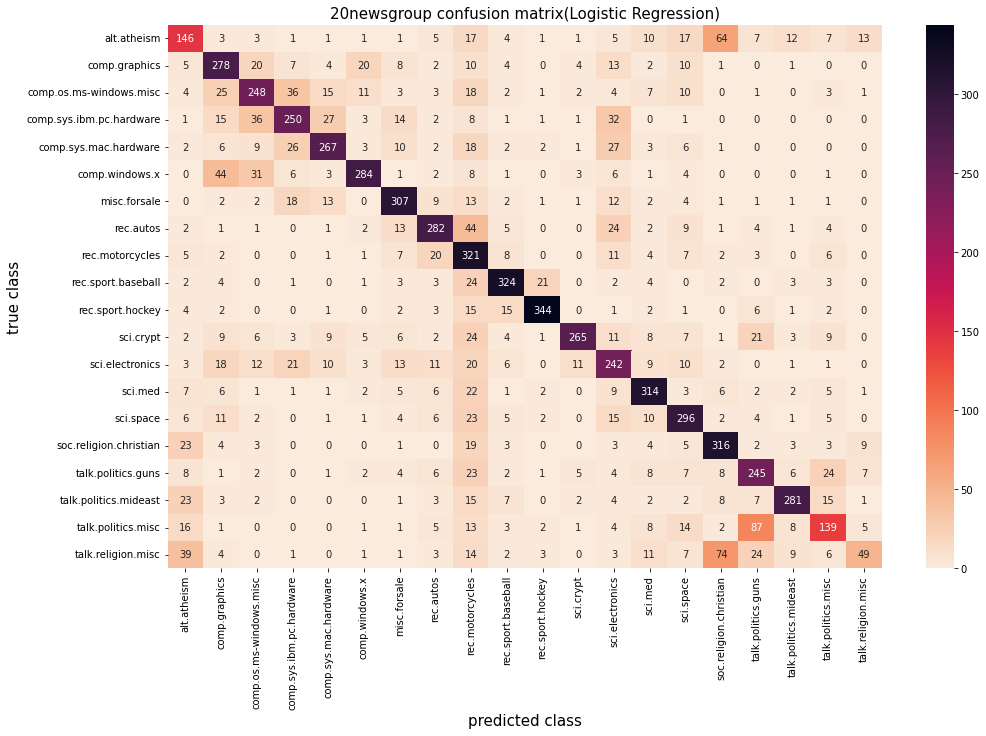

In [ ]:
mat_news_lr= metrics.confusion_matrix(y_test_news, log_reg.predict(x_test_tfidf))
plt.figure(figsize=(16,10))
newsmat=sns.heatmap(mat_news_lr, annot=True, cmap=sns.cm.rocket_r, fmt='g',
            xticklabels=newsgroup_train.target_names, yticklabels=newsgroup_train.target_names)
plt.xlabel('predicted class', fontsize=15)
plt.ylabel('true class', fontsize=15)
plt.title('20newsgroup confusion matrix(Logistic Regression)', fontsize=15)

Text(0.5, 1.0, '20newgroup Logistics Regression accuracy line chart')

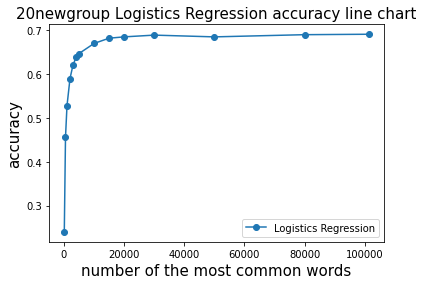

In [ ]:
num_features_news=[100, 500, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, 30000, 50000, 80000, 101322]
acc_newlr = [0.240, 0.456, 0.528, 0.590, 0.621, 0.638, 0.647, 0.670, 0.682, 0.685, 0.689, 0.685, 0.690, 0.691]
plt.plot(num_features_news, acc_newlr, marker='o', label='Logistics Regression')
plt.legend()
plt.xlabel('number of the most common words', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.title('20newgroup Logistics Regression accuracy line chart', fontsize=15)

## Sentiment140 datset:

In [ ]:
twitter_test=pd.read_csv('/content/drive/MyDrive/COMP551p2/new_testdata.manual.2009.06.14.csv', header=None)
twitter_test.columns=['sentiment', 'id', 'date', 'query', 'user', 'text']
twitter_test['sentiment']=twitter_test['sentiment'].replace(4,1)
twitter_test

,sentiment,id,date,query,user,text
0,1,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,1,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,1,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,1,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
354,1,14071,Sun Jun 14 04:31:28 UTC 2009,latex,yomcat,"After using LaTeX a lot, any other typeset mat..."
355,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
356,1,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
357,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [ ]:
twitter_train=twitter.sample(n=60000,random_state=1)

In [ ]:
countvector = CountVectorizer(stop_words='english', max_features=1000)
x_sent=twitter_train['text']
y_sent=twitter_train['sentiment'].to_numpy()
x_train_ct=countvector.fit_transform(x_sent)
tfidf=TfidfTransformer()
x_train_tf=tfidf.fit_transform(x_train_ct)
x_train_tf.shape

In [ ]:
x_senttest=twitter_test['text']
y_test_twit=twitter_test['sentiment']
x_test_ct=countvector.transform(x_senttest)
x_test_tf = tfidf.transform(x_test_ct)
x_test_tf.shape


###K-fold CROSS VALIADATION

In [ ]:
error_valid_min=100000000
best_hyper = 0

for alpha in range(1,16,1):
  nbm = MultinomialNaiveBayes(alpha*0.1)
  error_valid = kfoldCV(nbm,x_train_tf,y_sent,5)
  if(error_valid<error_valid_min):
    error_valid_min = error_valid
    best_hyper = alpha*0.1

best_hyper

### Naive Bayes Class

In [ ]:
nb = MultinomialNaiveBayes(0.1)
nb.fit(x_train_tf, y_sent)
nb.predict(x_test_tf)
nb.acc(x_test_tf, y_test_twit)


0.7715877437325905

In [ ]:
nb = MultinomialNaiveBayes(1.5)
nb.fit(x_train_tf, y_sent)
nb.predict(x_test_tf)
nb.acc(x_test_tf, y_test_twit)

0.7688022284122563

Text(0.5, 1.0, '140sentiment confusion matrix(Naive Bayes)')

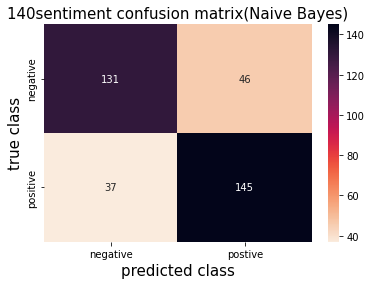

In [ ]:
mat_twit= metrics.confusion_matrix(y_test_twit, nb.predict(x_test_tf))
twittermat=sns.heatmap(mat_twit, annot=True, cmap=sns.cm.rocket_r, fmt='g',
            xticklabels=['negative', 'postive'], yticklabels=['negative', 'positive'])
plt.xlabel('predicted class', fontsize=15)
plt.ylabel('true class', fontsize=15)
plt.title('140sentiment confusion matrix(Naive Bayes)', fontsize=15)

Text(0.5, 1.0, '140sentiment dataset Naive Bayes accuracy line chart')

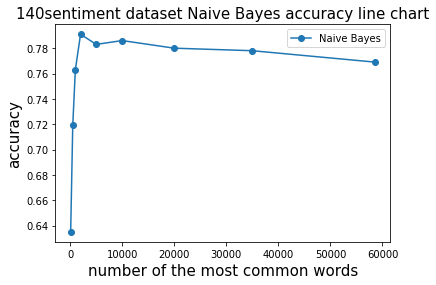

In [ ]:
num_features_twe = [100, 500, 1000, 2000, 5000, 10000, 20000, 35000, 58574]
acc_twenb = [0.635, 0.719, 0.763, 0.791, 0.783, 0.786, 0.780, 0.778, 0.769]
plt.plot(num_features_twe, acc_twenb, marker='o', label='Naive Bayes')
plt.legend()
plt.xlabel('number of the most common words', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.title('140sentiment dataset Naive Bayes accuracy line chart', fontsize=15)

Text(0.5, 1.0, 'Comparsion of two models on Sentiment140 Dataset')

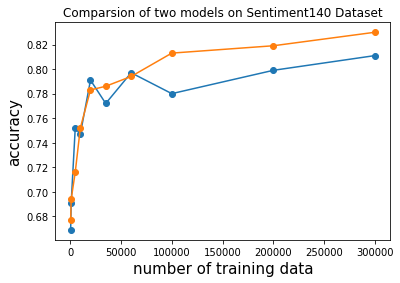

In [ ]:
num_traindata=[500, 1000, 5000, 10000, 20000, 35000, 60000, 100000, 200000, 300000]
acc_nb=[0.669, 0.691, 0.752, 0.747, 0.791, 0.772, 0.797, 0.780, 0.799, 0.811]
acc_lr=[0.677, 0.694, 0.716, 0.752, 0.783, 0.786, 0.794, 0.813, 0.819, 0.830]
plt.plot(num_traindata, acc_nb, marker='o', label='Naive Bayes')
plt.plot(num_traindata, acc_lr, marker='o', label='Logistics Regression')
plt.xlabel('number of training data', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.title('Comparsion of two models on Sentiment140 Dataset')


### Logistic Regression Classification:

#### cross validation

In [ ]:

error_valid_min=100000000
best_hyper = 0
for c in range(1,11,1):
  log_reg= LogisticRegression(C=c*0.1)
  error_valid = kfoldCV(log_reg,x_train_tf,y_sent,5)
  if(error_valid<error_valid_min):
    error_valid_min = error_valid
    best_hyper = c*0.1
best_hyper

NameError: ignored

In [ ]:
lr = LogisticRegression(C=1)
lr.fit(x_train_tf, y_sent)
lr.predict(x_test_tf)
lr.score(x_test_tf, y_test_twit)

In [ ]:
mat_twit_lr= metrics.confusion_matrix(y_test_twit, lr.predict(x_test_tf))
twittermat=sns.heatmap(mat_twit_lr, annot=True, cmap=sns.cm.rocket_r, fmt='g',
            xticklabels=['negative', 'postive'], yticklabels=['negative', 'positive'])
plt.xlabel('predicted class', fontsize=15)
plt.ylabel('true class', fontsize=15)
plt.title('Sentiment140 confusion matrix(Logistic Regression)', fontsize=15)

In [ ]:
num_features_twe = [100, 500, 1000, 2000, 5000, 10000, 20000, 35000, 58574]
acc_twelr = [0.627, 0.727, 0.758, 0.786, 0.769, 0.786, 0.788, 0.799, 0.794]
plt.plot(num_features_twe, acc_twelr, marker='o', label='Logistics Regression')
plt.legend()
plt.xlabel('number of the most commone words', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.title('Sentiment140 dataset Logistics Regression accuracy line chart', fontsize=15)

#Fit-intercept Testing

##20news group

In [ ]:
  log_reg= LogisticRegression(fit_intercept=False)
  error_valid = kfoldCV(log_reg,x_train_tfidf,y_newsgroup,5)
  error_valid

In [ ]:
  log_reg= LogisticRegression()
  error_valid = kfoldCV(log_reg,x_train_tfidf,y_newsgroup,5)
  error_valid

##Sentiment140

In [ ]:
log_reg= LogisticRegression(fit_intercept=False)
error_valid = kfoldCV(log_reg,x_train_tf,y_sent,5)
error_valid

In [ ]:
log_reg= LogisticRegression()
error_valid = kfoldCV(log_reg,x_train_tf,y_sent,5)
error_valid